In [3]:
import pandas as pd

In [4]:
dataset = pd.read_csv('bengaluru_land_prices.csv')
df = pd.DataFrame(data=dataset)
df.head()

,Location,Pin Code,Land Area (sq.ft),Property Type,Price per sq.ft (INR),BBMP Property Tax (INR),Stamp Duty (INR),Road Width (m),Zoning,Proximity to Metro (km),Flood Risk,Pollution Index,Proximity to IT Hub (km),Water Supply,Crime Rate,Historical Price Trend (5Y % Change),Total Price (INR)
0,Bannerghatta Road,560009,1500,Mixed Use,12000,9000,108000,30,Residential,3.0,Yes,Low,0.2,Moderate,High,12,18000000
1,Bannerghatta Road,560090,2400,Industrial,10500,12600,151200,30,Mixed Use,5.0,Yes,Moderate,5.0,Poor,Moderate,11,25200000
2,Bannerghatta Road,560041,1500,Commercial,15500,11625,139500,30,IT Zone,1.0,Yes,Moderate,3.0,Moderate,Moderate,11,23250000
3,Bannerghatta Road,560013,3500,Industrial,10500,18375,220500,25,Commercial,6.0,Yes,Low,0.2,Good,Low,21,36750000
4,Bannerghatta Road,560093,5000,Industrial,15500,38750,465000,20,Mixed Use,0.5,Yes,High,0.2,Moderate,Moderate,21,77500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Location                              115 non-null    object 
 1   Pin Code                              115 non-null    int64  
 2   Land Area (sq.ft)                     115 non-null    int64  
 3   Property Type                         115 non-null    object 
 4   Price per sq.ft (INR)                 115 non-null    int64  
 5   BBMP Property Tax (INR)               115 non-null    int64  
 6   Stamp Duty (INR)                      115 non-null    int64  
 7   Road Width (m)                        115 non-null    int64  
 8   Zoning                                115 non-null    object 
 9   Proximity to Metro (km)               115 non-null    float64
 10  Flood Risk                            115 non-null    object 
 11  Pollution Index    

## Data Cleaning

In [6]:
df.drop(columns="Pin Code", inplace=True)

In [7]:
### 1. Handling Missing Values ###
print("Missing Values Before Handling:\n",df.isnull().sum())

Missing Values Before Handling:
 Location                                0
Land Area (sq.ft)                       0
Property Type                           0
Price per sq.ft (INR)                   0
BBMP Property Tax (INR)                 0
Stamp Duty (INR)                        0
Road Width (m)                          0
Zoning                                  0
Proximity to Metro (km)                 0
Flood Risk                              0
Pollution Index                         0
Proximity to IT Hub (km)                0
Water Supply                            0
Crime Rate                              0
Historical Price Trend (5Y % Change)    0
Total Price (INR)                       0
dtype: int64


In [8]:
### 2. Removing Duplicates ###
initial_rows = df.shape[0]
df = df.drop_duplicates()
print(f"Removed {initial_rows - df.shape[0]} duplicate rows.")

Removed 0 duplicate rows.


In [9]:
df.head()

,Location,Land Area (sq.ft),Property Type,Price per sq.ft (INR),BBMP Property Tax (INR),Stamp Duty (INR),Road Width (m),Zoning,Proximity to Metro (km),Flood Risk,Pollution Index,Proximity to IT Hub (km),Water Supply,Crime Rate,Historical Price Trend (5Y % Change),Total Price (INR)
0,Bannerghatta Road,1500,Mixed Use,12000,9000,108000,30,Residential,3.0,Yes,Low,0.2,Moderate,High,12,18000000
1,Bannerghatta Road,2400,Industrial,10500,12600,151200,30,Mixed Use,5.0,Yes,Moderate,5.0,Poor,Moderate,11,25200000
2,Bannerghatta Road,1500,Commercial,15500,11625,139500,30,IT Zone,1.0,Yes,Moderate,3.0,Moderate,Moderate,11,23250000
3,Bannerghatta Road,3500,Industrial,10500,18375,220500,25,Commercial,6.0,Yes,Low,0.2,Good,Low,21,36750000
4,Bannerghatta Road,5000,Industrial,15500,38750,465000,20,Mixed Use,0.5,Yes,High,0.2,Moderate,Moderate,21,77500000


## EDA

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Summary statistics
print(df.describe())

       Land Area (sq.ft)  Price per sq.ft (INR)  BBMP Property Tax (INR)  \
count         115.000000             115.000000               115.000000   
mean         3760.869565           11734.782609             22178.260870   
std          1375.136080            2789.643865             10015.384833   
min          1500.000000            7500.000000              5625.000000   
25%          3000.000000            9000.000000             14700.000000   
50%          3500.000000           12000.000000             21000.000000   
75%          5000.000000           14000.000000             27562.500000   
max          6000.000000           15500.000000             46500.000000   

       Stamp Duty (INR)  Road Width (m)  Proximity to Metro (km)  \
count        115.000000      115.000000               115.000000   
mean      266139.130435       26.478261                 2.865217   
std       120184.617996        6.337507                 2.043734   
min        67500.000000       18.000000    

In [12]:
# Check missing values
print(df.isnull().sum())

Location                                0
Land Area (sq.ft)                       0
Property Type                           0
Price per sq.ft (INR)                   0
BBMP Property Tax (INR)                 0
Stamp Duty (INR)                        0
Road Width (m)                          0
Zoning                                  0
Proximity to Metro (km)                 0
Flood Risk                              0
Pollution Index                         0
Proximity to IT Hub (km)                0
Water Supply                            0
Crime Rate                              0
Historical Price Trend (5Y % Change)    0
Total Price (INR)                       0
dtype: int64


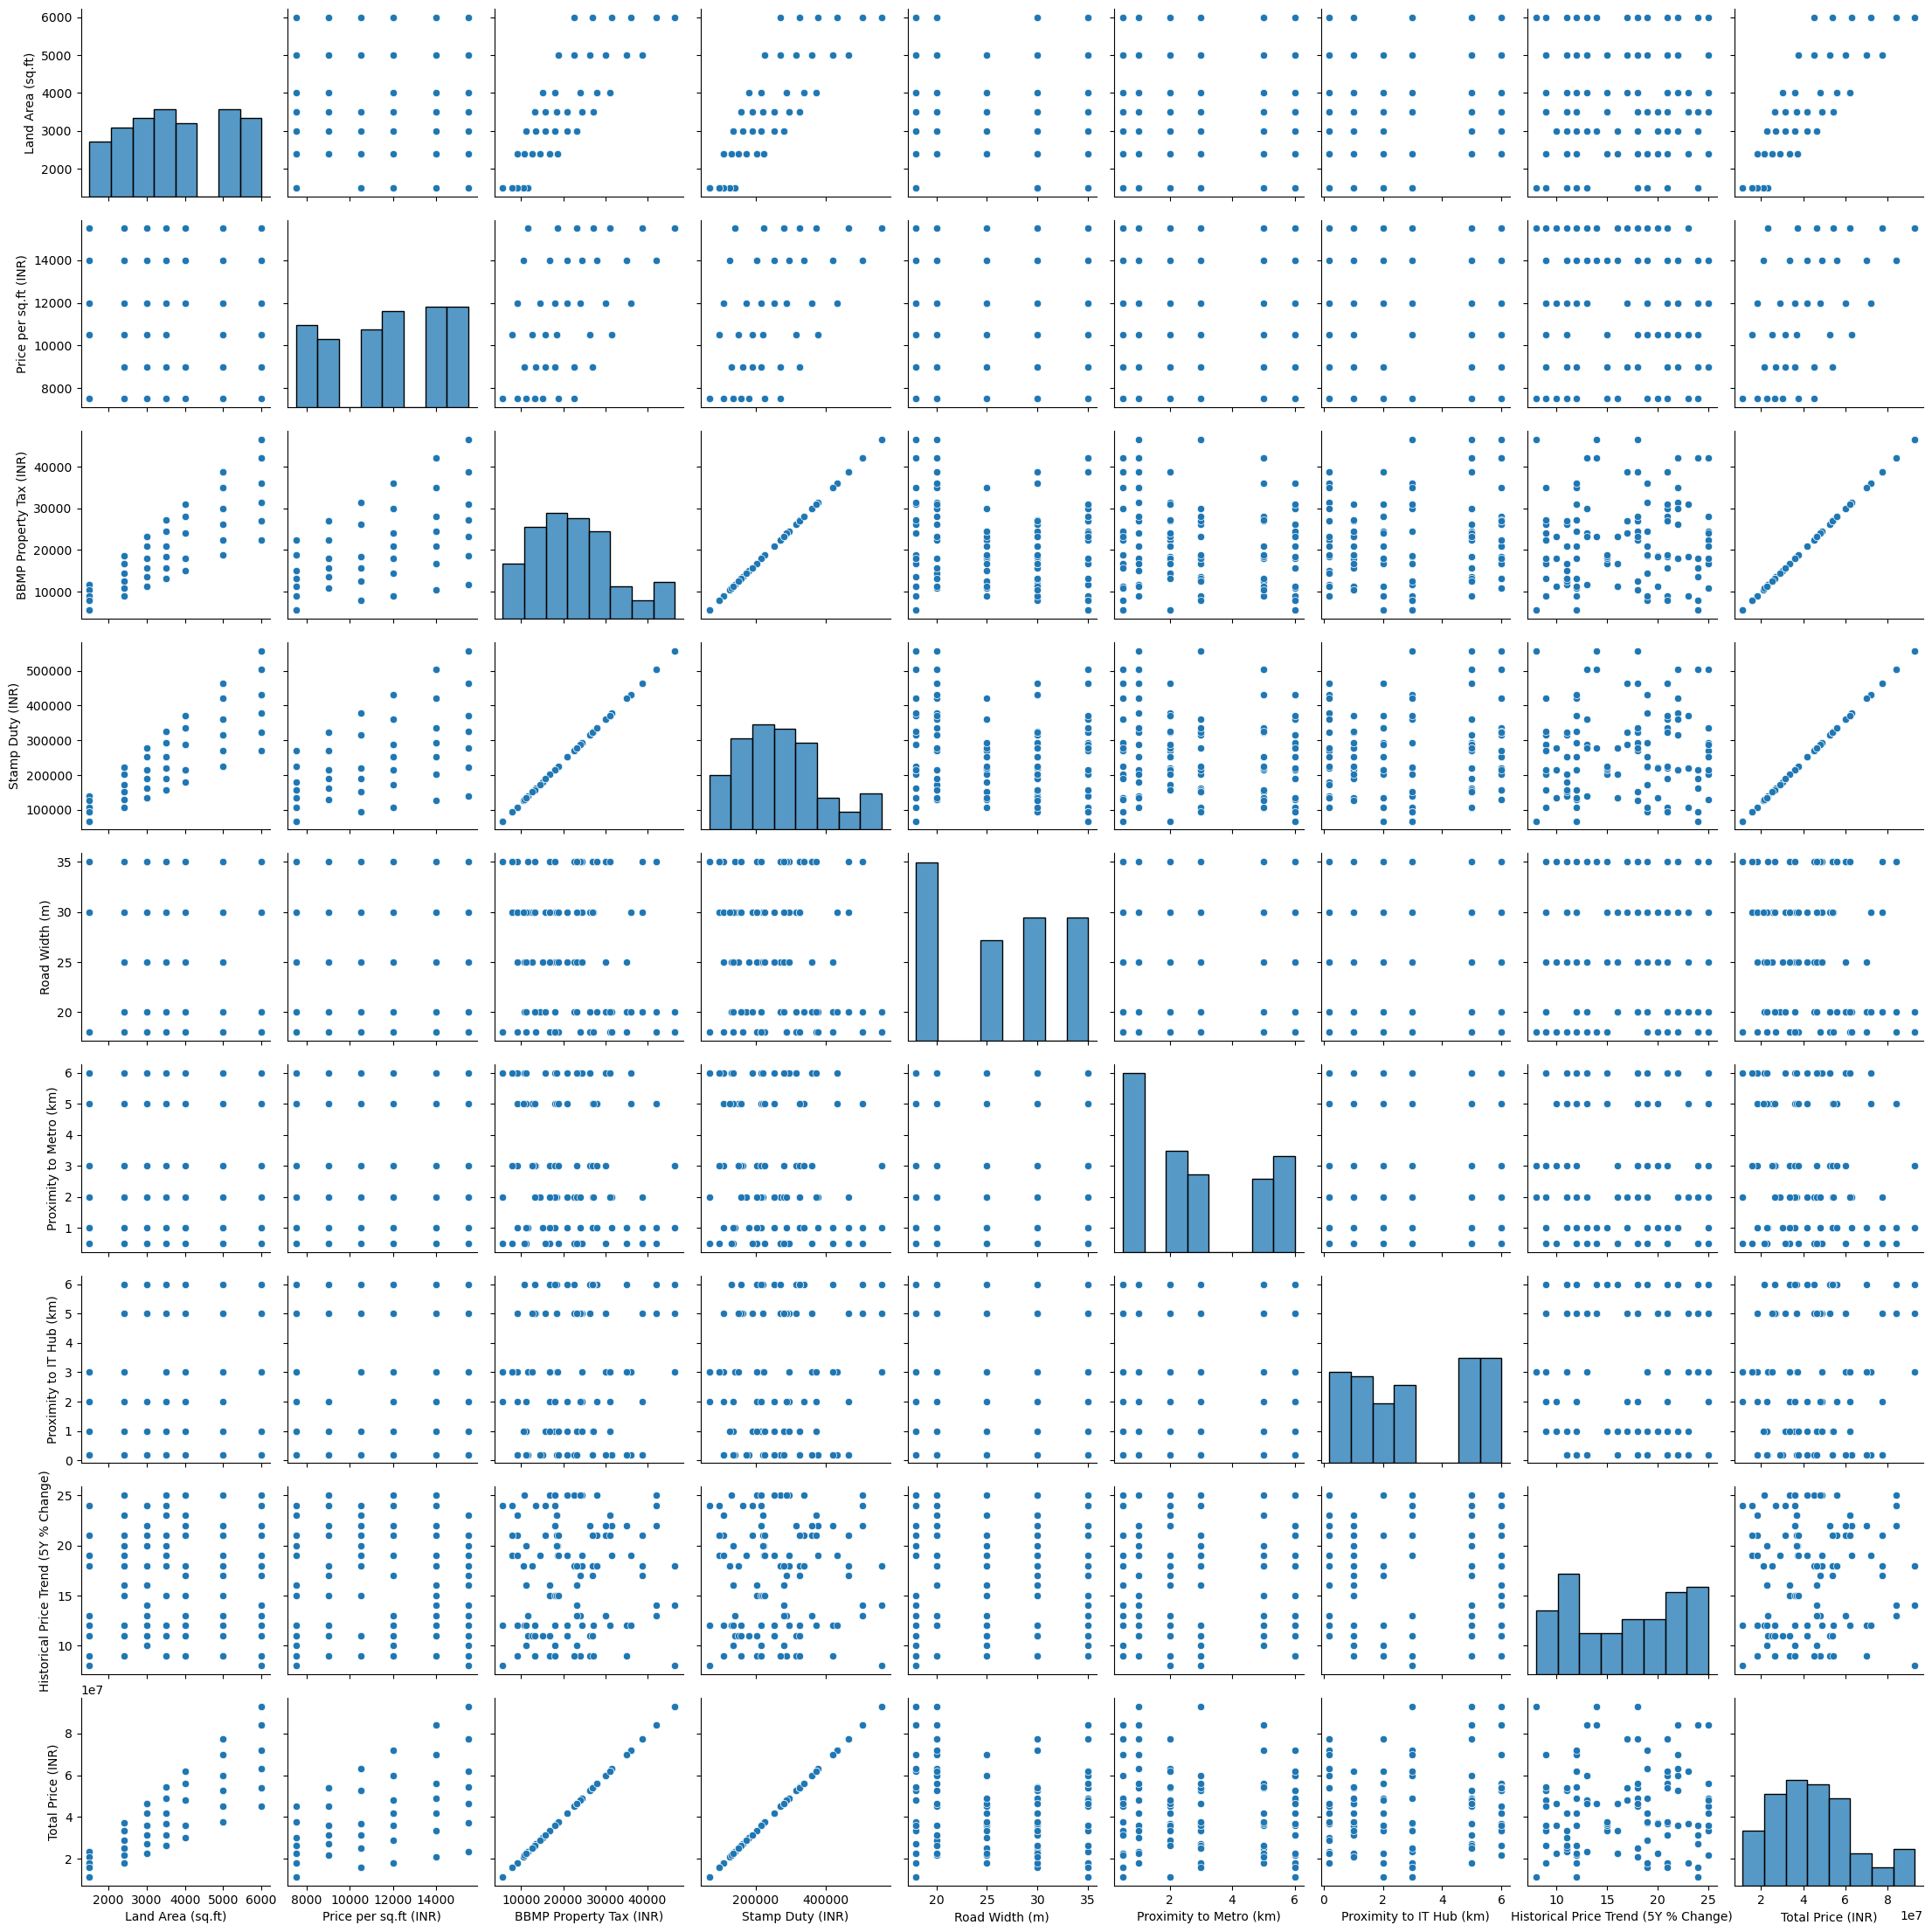

In [13]:
# Plot distributions of numerical features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(df[num_cols])

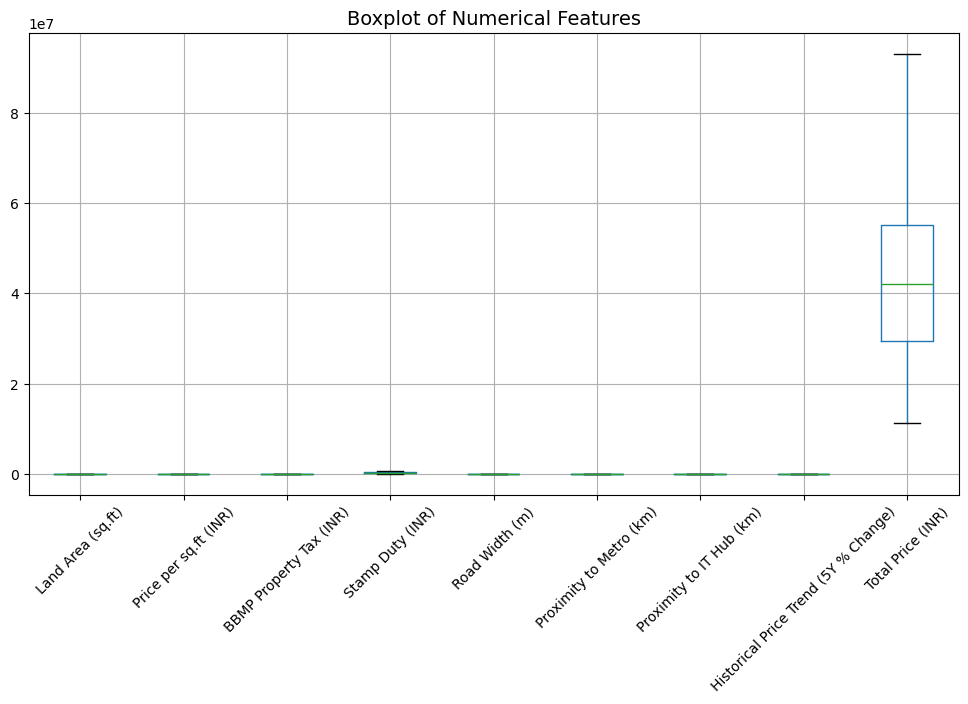

In [14]:
# Boxplot to check for outliers
plt.figure(figsize=(12, 6))
df[num_cols].boxplot(rot=45)
plt.title("Boxplot of Numerical Features", fontsize=14)
plt.show()

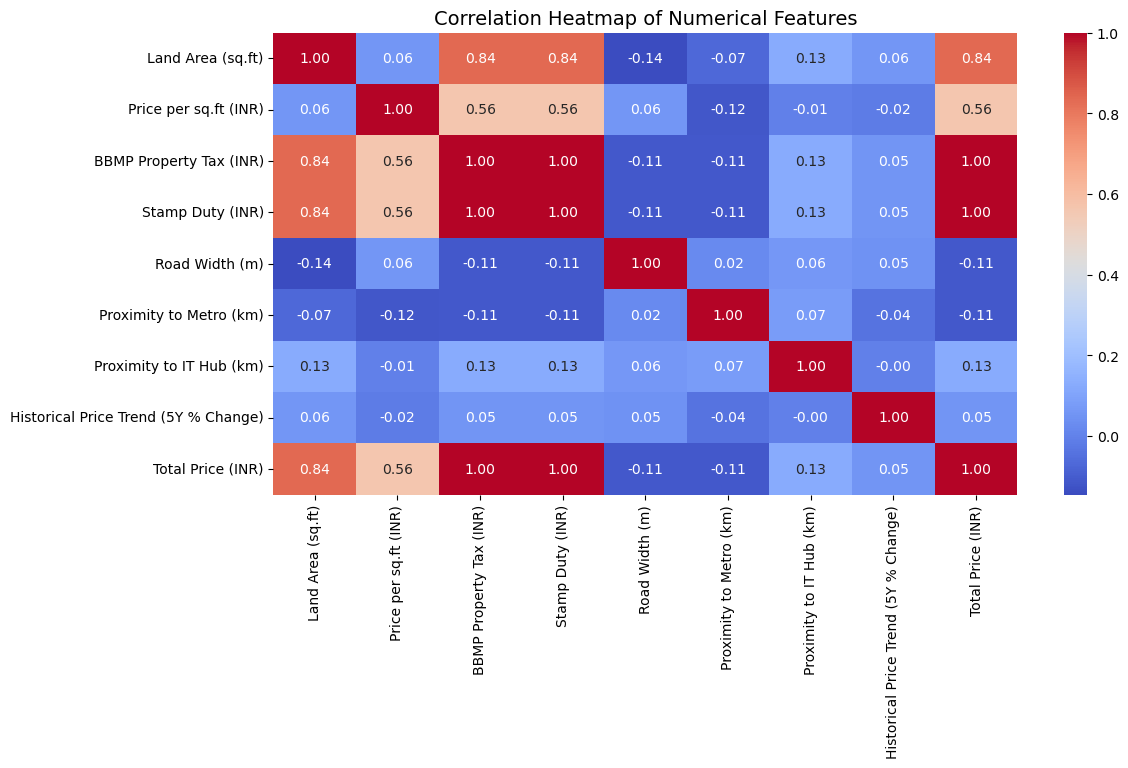

In [15]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

## Data Preprocessing

In [16]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

# Identifying categorical columns
one_hot_cols = ['Location', 'Property Type', 'Zoning']
label_encoding_cols = ['Flood Risk']
ordinal_encoding_cols = ['Pollution Index', 'Water Supply', 'Crime Rate']

# One-Hot Encoding with integer conversion
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)


# Label Encoding for 'Flood Risk'
label_encoder = LabelEncoder()
df['Flood Risk'] = label_encoder.fit_transform(df['Flood Risk'])  # Yes → 1, No → 0

# Ordinal Encoding for ordinal categories
ordinal_mapping = {
    'Pollution Index': ['Low', 'Moderate', 'High'],
    'Water Supply': ['Poor', 'Moderate', 'Good'],
    'Crime Rate': ['Low', 'Moderate', 'High']
}

for col, categories in ordinal_mapping.items():
    ordinal_encoder = OrdinalEncoder(categories=[categories])
    df[col] = ordinal_encoder.fit_transform(df[[col]])

df = df.astype(int)
df.head()

,Land Area (sq.ft),Price per sq.ft (INR),BBMP Property Tax (INR),Stamp Duty (INR),Road Width (m),Proximity to Metro (km),Flood Risk,Pollution Index,Proximity to IT Hub (km),Water Supply,...,Location_Nagawara,Location_Peenya,Location_Sarjapur Road,Property Type_Industrial,Property Type_Mixed Use,Property Type_Residential,Zoning_IT Zone,Zoning_Industrial,Zoning_Mixed Use,Zoning_Residential
0,1500,12000,9000,108000,30,3,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,2400,10500,12600,151200,30,5,1,1,5,0,...,0,0,0,1,0,0,0,0,1,0
2,1500,15500,11625,139500,30,1,1,1,3,1,...,0,0,0,0,0,0,1,0,0,0
3,3500,10500,18375,220500,25,6,1,0,0,2,...,0,0,0,1,0,0,0,0,0,0
4,5000,15500,38750,465000,20,0,1,2,0,1,...,0,0,0,1,0,0,0,0,1,0


In [17]:
from sklearn.preprocessing import StandardScaler
# Identify numerical features (excluding target variable)
numerical_features = ['Land Area (sq.ft)', 'Price per sq.ft (INR)', 'BBMP Property Tax (INR)', 'Stamp Duty (INR)']

# Apply StandardScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Move 'Total Price (INR)' to the last column
target_col = "Total Price (INR)"
df = df[[col for col in df.columns if col != target_col] + [target_col]]

# Save the modified dataset
df.to_csv("bengaluru_land_prices_scaled_reordered.csv", index=False)

print("Total Price (INR) moved to the last column successfully.")


df.head()

Total Price (INR) moved to the last column successfully.


,Land Area (sq.ft),Price per sq.ft (INR),BBMP Property Tax (INR),Stamp Duty (INR),Road Width (m),Proximity to Metro (km),Flood Risk,Pollution Index,Proximity to IT Hub (km),Water Supply,...,Location_Peenya,Location_Sarjapur Road,Property Type_Industrial,Property Type_Mixed Use,Property Type_Residential,Zoning_IT Zone,Zoning_Industrial,Zoning_Mixed Use,Zoning_Residential,Total Price (INR)
0,-1.651301,0.095488,-1.321560,-1.321560,30,3,1,0,0,1,...,0,0,0,1,0,0,0,0,1,18000000
1,-0.993956,-0.444568,-0.960540,-0.960540,30,5,1,1,5,0,...,0,0,1,0,0,0,0,1,0,25200000
2,-1.651301,1.355619,-1.058316,-1.058316,30,1,1,1,3,1,...,0,0,0,0,0,1,0,0,0,23250000
3,-0.190535,-0.444568,-0.381404,-0.381404,25,6,1,0,0,2,...,0,0,1,0,0,0,0,0,0,36750000
4,0.905040,1.355619,1.661870,1.661870,20,0,1,2,0,1,...,0,0,1,0,0,0,0,1,0,77500000


## Train-Test Split

In [18]:
from sklearn.model_selection import train_test_split
# Separate independent (X) and dependent (y) variables
X = df.drop(columns=["Total Price (INR)"])  # Features
y = df["Total Price (INR)"]  # Target variable

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (92, 38)
X_test shape: (23, 38)
y_train shape: (92,)
y_test shape: (23,)


## Model Selection and performance evaluation

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score
import numpy as np

In [20]:
def evaluate_model(true, predicted):
    r2_square = r2_score(true, predicted)
    adj_r2 = 1 - (1-r2_square) * (len(true)-1) / (len(true)-X_test.shape[1]-1)
    mape = np.mean(np.abs((true - predicted) / true)) * 100
    return r2_square, adj_r2, mape

def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predicted vs Actual")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label="Perfect Fit (y=x)")
    
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"{model_name} - Actual vs Predicted Prices")
    plt.legend()
    plt.grid(True)
    plt.show()

Linear Regression 

Model performance for Training set
- R2 Score: 1.0000
- Adjusted R2 Score: 1.0000
- Mean Absolute Percentage Error: 0.0000
----------------------------------
Model performance for Test set
- R2 Score: 1.0000
- Adjusted R2 Score: 1.0000
- Mean Absolute Percentage Error: 0.0000


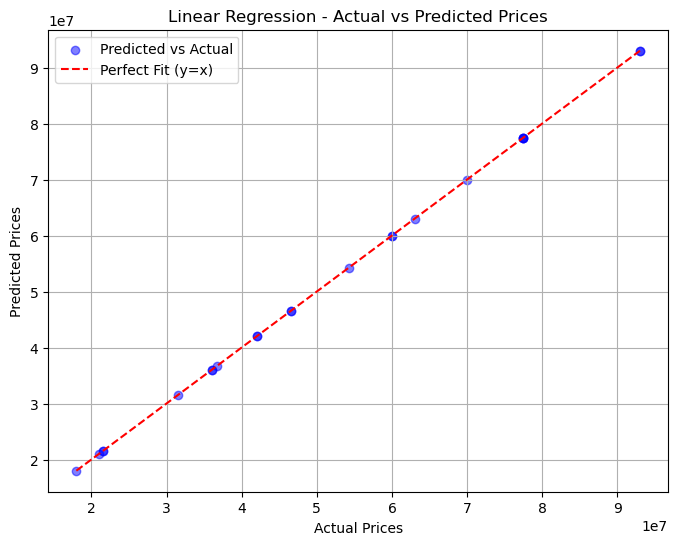



Lasso 

Model performance for Training set
- R2 Score: 1.0000
- Adjusted R2 Score: 1.0000
- Mean Absolute Percentage Error: 0.0353
----------------------------------
Model performance for Test set
- R2 Score: 1.0000
- Adjusted R2 Score: 1.0000
- Mean Absolute Percentage Error: 0.0566


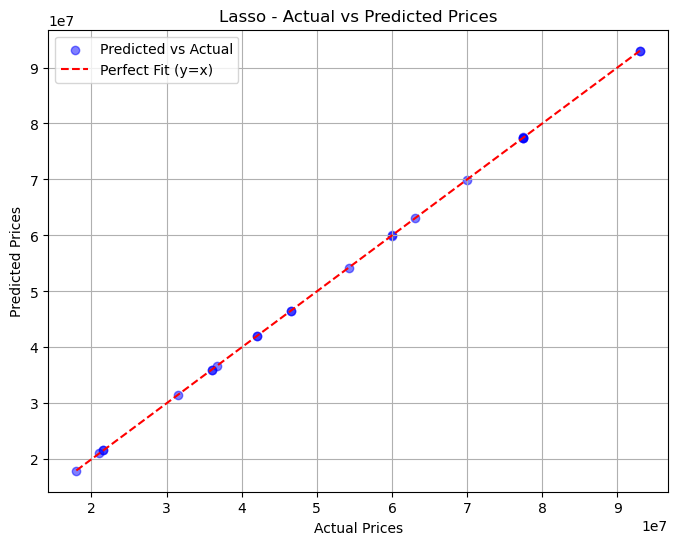



Ridge 

Model performance for Training set
- R2 Score: 0.9995
- Adjusted R2 Score: 0.9991
- Mean Absolute Percentage Error: 0.9611
----------------------------------
Model performance for Test set
- R2 Score: 0.9990
- Adjusted R2 Score: 1.0014
- Mean Absolute Percentage Error: 1.2118


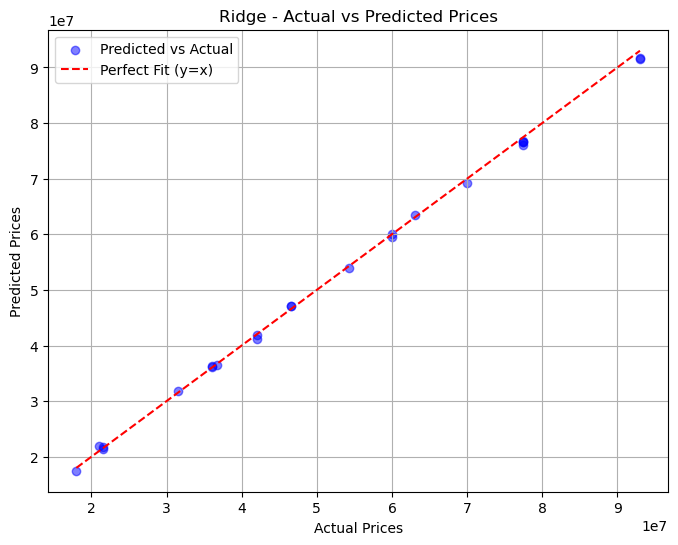



Random Forest Regressor 

Model performance for Training set
- R2 Score: 0.9991
- Adjusted R2 Score: 0.9985
- Mean Absolute Percentage Error: 0.6655
----------------------------------
Model performance for Test set
- R2 Score: 0.9881
- Adjusted R2 Score: 1.0164
- Mean Absolute Percentage Error: 3.1320


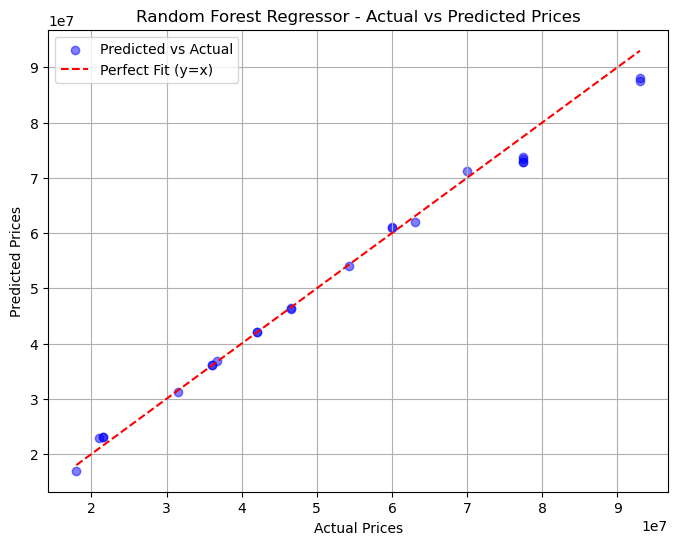

In [21]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Random Forest Regressor": RandomForestRegressor(),
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_r2 , model_train_adj_r2, model_train_mape = evaluate_model(y_train, y_train_pred)

    model_test_r2 , model_test_adj_r2, model_test_mape = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i],'\n')
    
    print('Model performance for Training set')
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print("- Adjusted R2 Score: {:.4f}".format(model_train_adj_r2))
    print("- Mean Absolute Percentage Error: {:.4f}".format(model_train_mape))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- R2 Score: {:.4f}".format(model_test_r2))
    print("- Adjusted R2 Score: {:.4f}".format(model_test_adj_r2))
    print("- Mean Absolute Percentage Error: {:.4f}".format(model_test_mape))
    
    plot_actual_vs_predicted(y_test, y_test_pred, list(models.keys())[i])

    print('='*35)
    print('\n')